In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

plt.rcParams["figure.figsize"] = (20,10)

## Quy chuẩn dữ liệu

__Game__: Empire Warriors <br>
__Platform__: IOS<br>
__Country__: United States<br>
__Date Range__: 2018-11-05 -> 2019-10-31<br>

### 1. Có Organic Uplift với TDi ở US không?

In [4]:
df = pd.read_excel('paid_org.xlsx')
df.head()

,date,organic,paid
0,2019-05-16,125,156
1,2019-05-17,120,135
2,2019-05-18,195,164
3,2019-05-19,164,114
4,2019-05-20,154,149


### I. Sử dụng Random Forest để tìm hiểu mối quan hệ của Paid và Organic install ở US

In [5]:
from sklearn.ensemble import RandomForestRegressor

In [6]:
rf = RandomForestRegressor(n_estimators=100, random_state=20)

X = np.array(df.paid).reshape(-1, 1) 
y = df.organic

rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=20, verbose=0, warm_start=False)

In [7]:
from sklearn.model_selection import GridSearchCV

rf_param = {
    'bootstrap': [True],
    'max_depth': [2, 5, 10, 20],
    'min_samples_leaf': [2, 3, 4],
    'n_estimators': [100, 200, 500]
}

rf = RandomForestRegressor(random_state=20)

grid_search = GridSearchCV(estimator=rf, param_grid=rf_param, cv=3, verbose=2)

grid_search.fit(X, y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] bootstrap=True, max_depth=2, min_samples_leaf=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=2, min_samples_leaf=2, n_estimators=100, total=   0.0s
[CV] bootstrap=True, max_depth=2, min_samples_leaf=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=2, min_samples_leaf=2, n_estimators=100, total=   0.0s
[CV] bootstrap=True, max_depth=2, min_samples_leaf=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, max_depth=2, min_samples_leaf=2, n_estimators=100, total=   0.0s
[CV] bootstrap=True, max_depth=2, min_samples_leaf=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, min_samples_leaf=2, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=2, min_samples_leaf=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, min_samples_leaf=2, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=2, min_samples_leaf=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, min_samples_leaf=2, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=2, min_samples_leaf=2, n_estimators=500 
[CV]  bootstrap=True, max_depth=2, min_samples_leaf=2, n_estimators=500, total=   0.4s
[CV] bootstrap=True, max_depth=2, min_samples_leaf=2, n_estimators=500 
[CV]  bootstrap=True, max_depth=2, min_samples_leaf=2, n_estimators=500, total=   0.4s
[CV] bootstrap=True, max_depth=2, min_samples_leaf=2, n_estimators=500 
[CV]  bootstrap=True, max_depth=2, min_samples

[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100, total=   0.0s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=500 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=500, total=   0.4s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=500 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=500, total=   0.4s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=500 
[CV]  bootstrap=True, max_depth=10

[CV]  bootstrap=True, max_depth=20, min_samples_leaf=4, n_estimators=500, total=   0.4s


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   29.6s finished
c:\users\asus\tfgpu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=20, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'bootstrap': [True], 'max_depth': [2, 5, 10, 20], 'min_samples_leaf': [2, 3, 4], 'n_estimators': [100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [8]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

evaluate(grid_search.best_estimator_, X, y)

Model Performance
Average Error: 20.2460.
Accuracy = 79.72%.


79.71729566912474

In [9]:
def visualize_regression_prediciton(model, X, y, interval=1):
    X_grid = np.arange(min(X), max(X), interval)  

    # reshape for reshaping the data into a len(X_grid)*1 array,  
    # i.e. to make a column out of the X_grid value                   
    X_grid = X_grid.reshape((len(X_grid), 1)) 

    # Scatter plot for original data 
    plt.scatter(X, y, color = 'blue', label='Real')   

    # plot predicted data 
    plt.plot(X_grid, model.predict(X_grid),  
             color = 'green', label='Prediction')  
    plt.title('Random Forest Regression') 
    plt.xlabel('Paid install') 
    plt.ylabel('Organic install')
    plt.legend(loc='best', fontsize=14)
    plt.show()

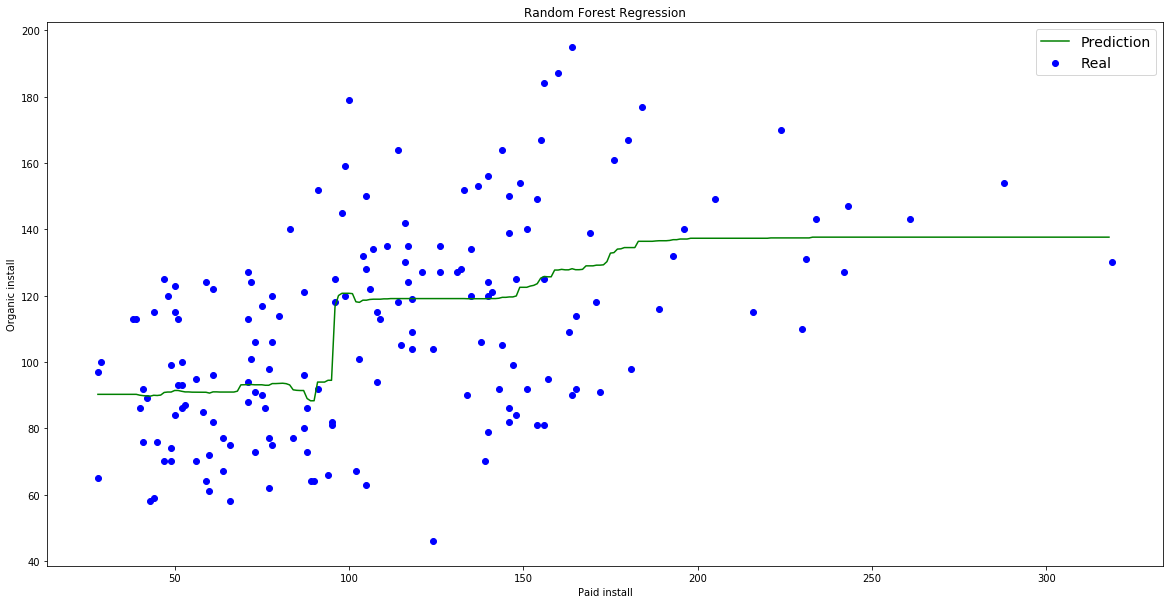

In [16]:
visualize_regression_prediciton(grid_search.best_estimator_, X, y)

### II. Sử dụng mô hình tuyến tính để tìm hiểu mối quan hệ của Paid và Organic install ở US

In [17]:
from sklearn.linear_model import ElasticNet

en = ElasticNet()
en.fit(X, y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

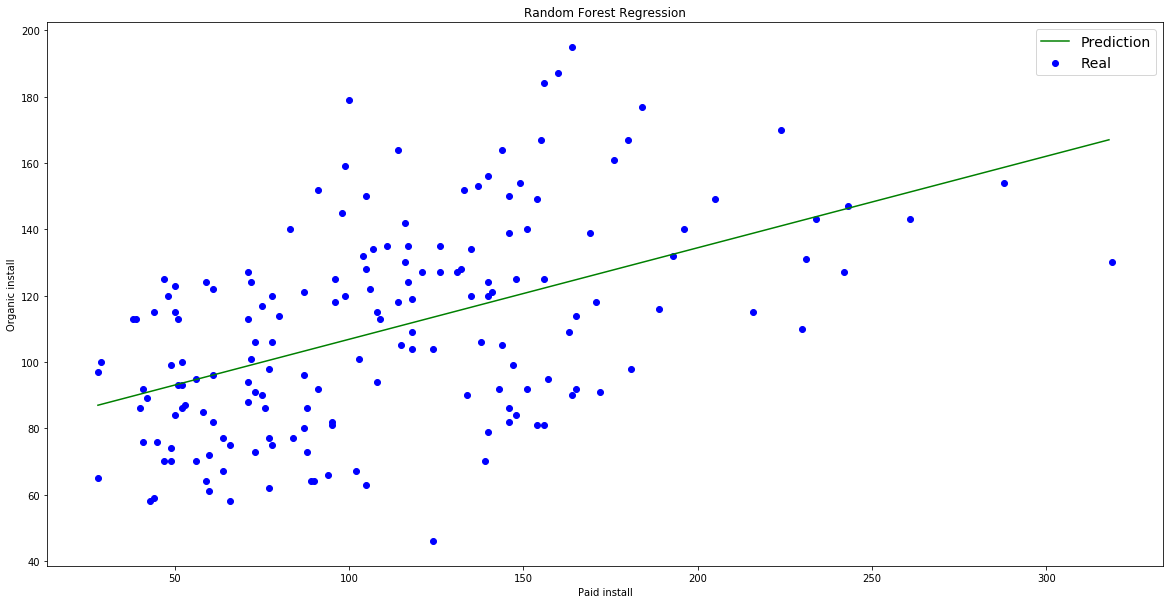

In [18]:
visualize_regression_prediciton(en, X, y)

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=20, n_iter_no_change=5)
gb_param = {
    'loss': ['ls', 'huber'],
    'learning_rate': [0.001, 0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 500, 1000],
    'min_samples_split': [2, 3, 4]
}

gb_grid_search = GridSearchCV(estimator=gb, param_grid=gb_param, cv=3, verbose=0, n_jobs=-1)

gb_grid_search.fit(X, y)

c:\users\asus\tfgpu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=20, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'loss': ['ls', 'huber'], 'learning_rate': [0.001, 0.01, 0.1, 0.3], 'n_estimators': [100, 200, 500, 1000], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Model Performance
Average Error: 20.6653.
Accuracy = 79.03%.


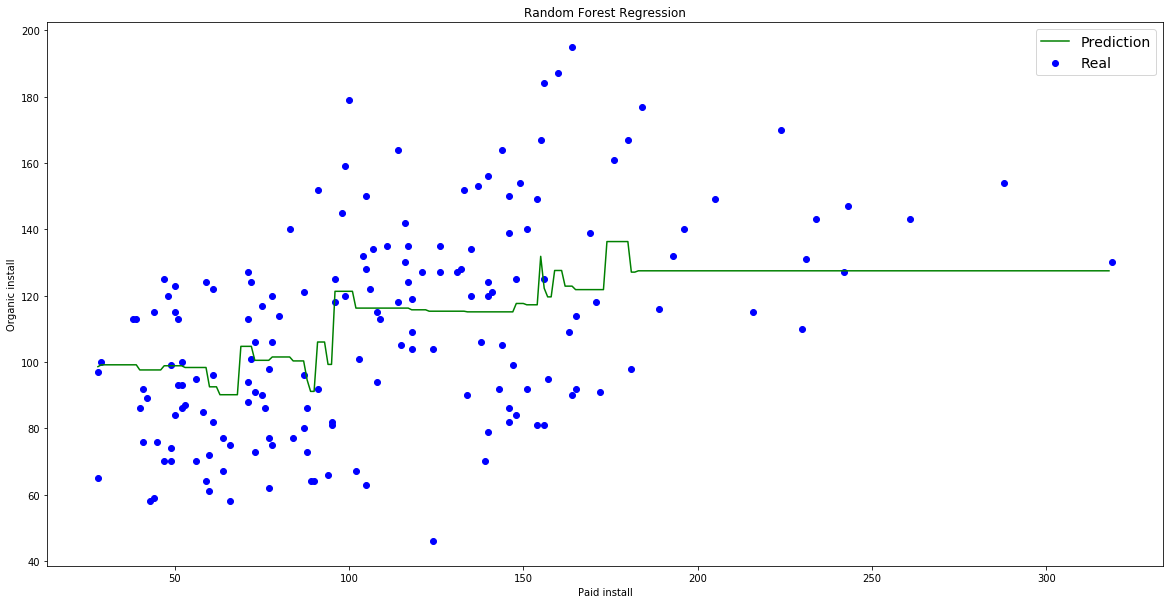

In [20]:
evaluate(gb_grid_search.best_estimator_, X, y)
visualize_regression_prediciton(gb_grid_search.best_estimator_, X, y)

In [21]:
def calculate_and_plot(data=df, start_date='2018-11-05', end_date='2019-10-31'):
    df_2107 = df.loc[(df['date'] >= start_date) & (df['date'] <= end_date)]

    X_2107 = np.array(df_2107.paid).reshape(-1, 1) 
    y_2107 = df_2107.organic

    lr_2107 = LinearRegression()
    lr_2107.fit(X_2107, y_2107)
    print('Score: ', lr_2107.score(X_2107, y_2107))

    print('Organic Uplift: ', lr_2107.coef_)
    print('Baseline: ', lr_2107.intercept_)

    y_pred_2107 = lr_2107.predict(X_2107)

    plt.scatter(X_2107, y_2107, color='black')
    plt.plot(X_2107, y_pred_2107, color='blue', linewidth=3, label='linear')
    plt.ylabel('Organic Install')
    plt.xlabel('Paid Install')

    plt.legend(fontsize=18)
    plt.show()

## Quy chuẩn dữ liệu

__Game__: Empire Warriors <br>
__Platform__: IOS<br>
__Country__: United States<br>
__Date Range__: 2018-11-05 -> 2019-10-31<br>

### 1. Có Organic Uplift với TDi ở US không?
### 2. Nếu có thì con số k-factor (= organic uplift/paid install) dao động như nào?
### 3. Có dự đoán được organic uplift trong tương lai hay ko? 

Cách tiếp cận đơn giản nhất cho câu hỏi này là thông qua mối quan hệ tuyến tính giữa lượng paid install và organic install theo từng ngày của TDi US

Từ phương trình tuyến tính cơ bản có dạng:
> $ y = a * X + b $

Có thể ước chừng ảnh hưởng của paid install đến organic install theo phương trình:
> $ Organic = Base + Uplift * Paid $

Trong đó, $Base$ là lượng Install không bị ảnh hưởng bởi Paid Install, $Uplift$ là mức độ ảnh hưởng của Paid Install đến Organic Install (là Organic Uplift)

=> sử dụng dữ liệu theo từng khoảng thời gian để tạo phương trình

__Từ 05/11/2018 đén 31/10/2019__

Score:  0.24271899159574584
Organic Uplift:  [0.27621683]
Baseline:  79.21188805401853


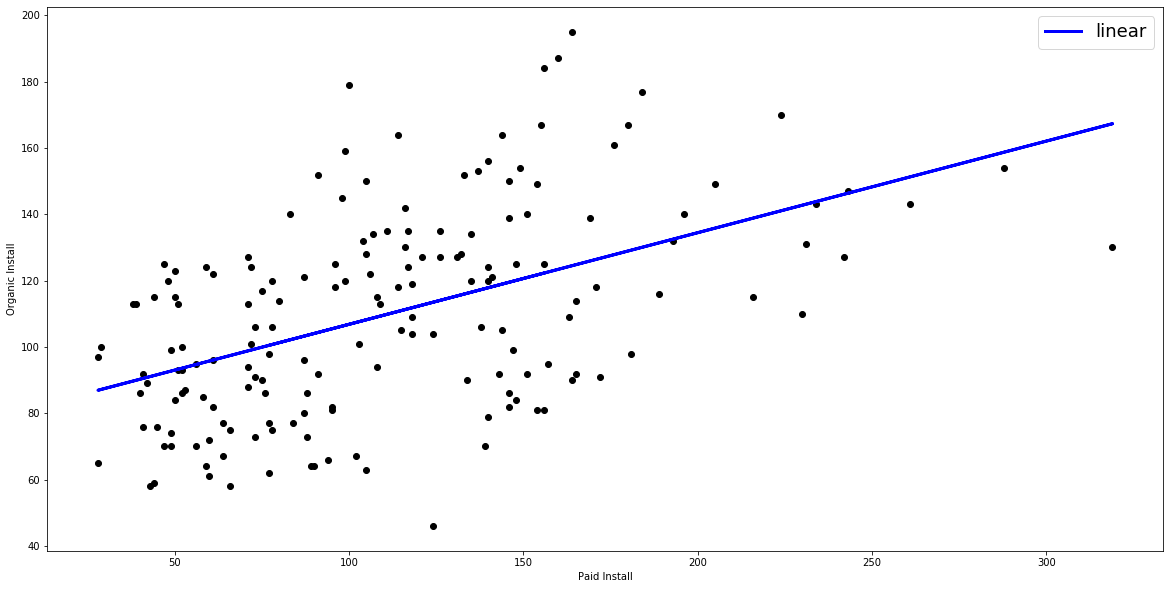

In [22]:
calculate_and_plot(start_date='2018-11-05')

Có thế thấy lượng Paid Install và Organic Install có sự tương quan với nhau, và phương trình cần tìm là (tương đối) :

> $ Organic =  50.6772 + 0.4751 * Paid$

Tương tự với các khoảng thời gian khác:

__Từ 15/05/2019 đến 31/10/2019__

Score:  0.24271899159574584
Organic Uplift:  [0.27621683]
Baseline:  79.21188805401853


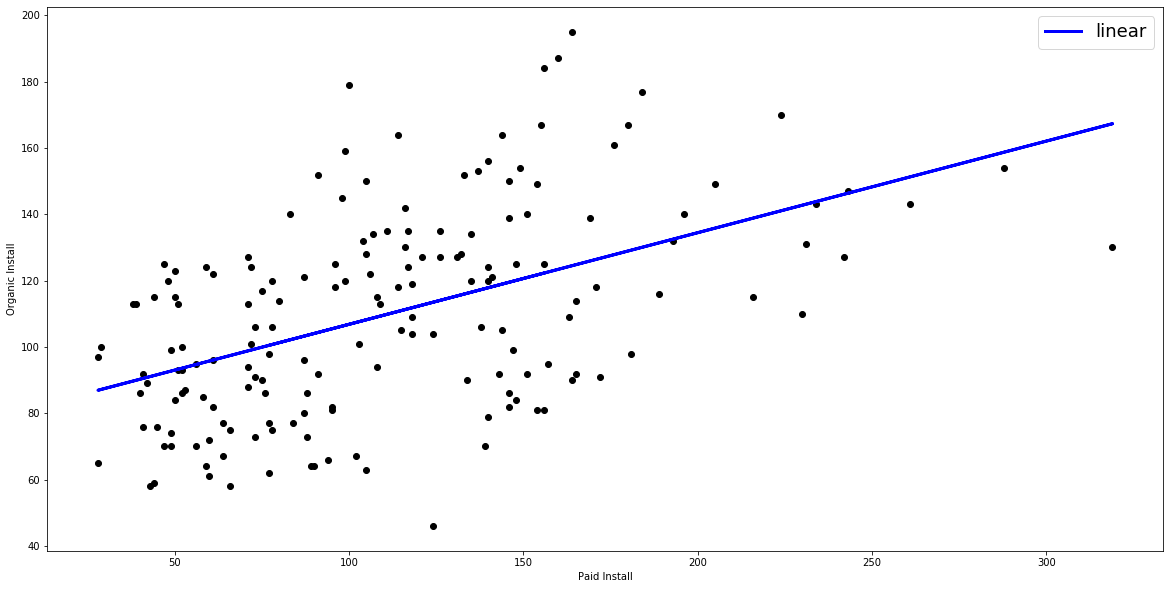

In [23]:
calculate_and_plot(start_date='2019-05-15')

Ta có phương trình tương đối:

> $ Organic =  86.0852 + 0.2435 * Paid$

__Từ 09/09/2019 đến 31/10/2019__

Score:  0.24081975658831214
Organic Uplift:  [0.16189961]
Baseline:  76.98387302943712


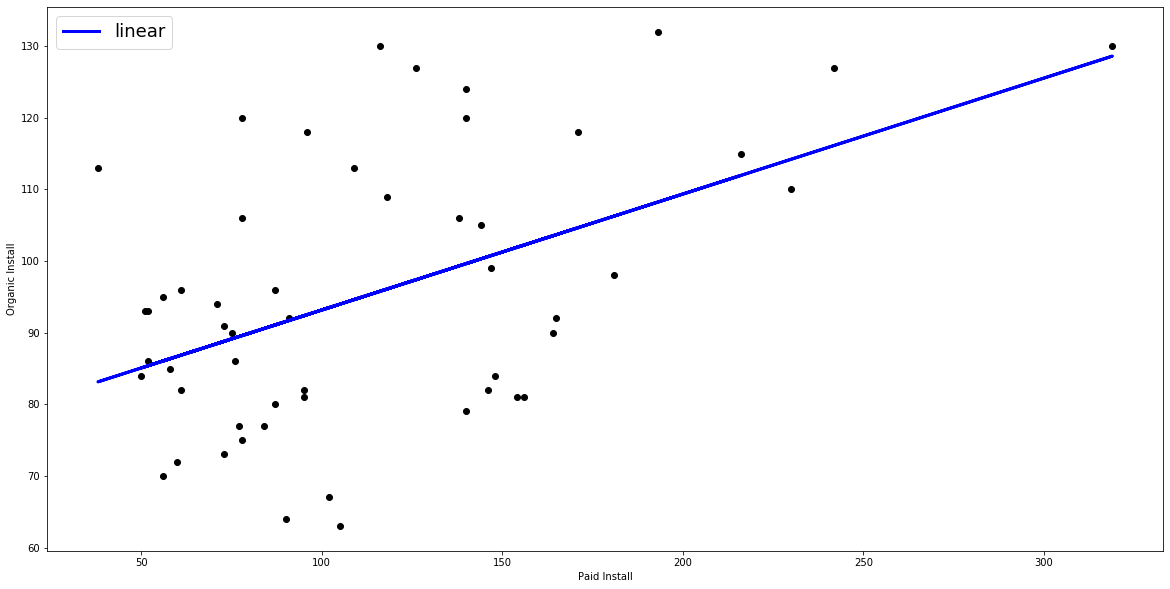

In [24]:
calculate_and_plot(start_date='2019-09-09')

Ta có phương trình tương đối:

> $ Organic =  73.8205 + 0.1724 * Paid$

### Kết luận

1. Theo cách tiếp cận này có thể trả lời là có tồn tại Organic Uplift ở TDi US, tuy nhiên tại mỗi khoảng thời điểm khác nhau thì giá trị này cũng khác nhau
2. Sự dao động của __k-factor = organic uplift / paid install__ sẽ khác nhau theo time range sử dụng, ví dụ nếu theo dõi theo ngày thì chỉ số này sẽ bằng __Organic install / Paid install__
3. Có thể dự đoán Organic install từ Paid install nhưng độ chính xác sẽ thấp và ảnh hưởng lớn bời khoảng thời gian trainning